## Imports

In [216]:
import numpy as np
import pylab as plt
from matplotlib import cm
import seaborn as sns
from tqdm import tqdm

## System

> NLSE differential equation

\begin{equation}
\partial_z A + \frac{\alpha}{2}A+\frac{i}{2}\beta_2 \partial_T^2 A = i \gamma \| A\|^2 A
\end{equation}

For now, let's suppose $\alpha=0$

\begin{equation}
\partial_z A = (\hat{D}+\hat{N})A 
\end{equation}

with $\hat{D}=-\frac{i}{2}\beta_2 \partial_T^2$ and $\hat{N}=i \gamma \| A\|^2$



The operator $\hat{D}$ will be computed in the fourier domain such that $\hat{D}(\omega)=\frac{i}{2}\omega^2\beta_2$

Finally we have at first glance :

\begin{equation}
A(z+h, T)=e^{h\hat{N}} F^{-1} \cdot e^{h\hat{D}(\omega)} \cdot F \cdot A(z,t)
\end{equation}

Where $F$ is the Fourier operator, $h$ is the propagation step (of a few meters) and $\beta_2=-D\lambda^2/2\pi c$ wich is related to the optical fiber chromatic dispersion.

> Source : doi:10.1109/ICEE.2007.4287333 

In [222]:
# Constants

c=3e8 # light celerity
l0 = 1.55e-6 # wavelength
nm = 1e-9 # nanometer
ns = 1e-9
km = 5e3 #kilometer
ps = 1e-12 #picosecond
D = -17*ps/nm/km # Dispersion
b2 = -D*l0**2/(2*np.pi*c) # group velocity dispersion (2nd order)

# Parameters

alpha=0 # Losses
gamma=0.78e-3 # Nonlinear factor https://ieeexplore.ieee.org/document/7764544

L = 1e3 # Fiber length

Nt= 10000 # Time sampling
Nl = 1000 # Length sampling

# Calculated factors and vectors

h = L/Nl # Lengthstep

T = np.linspace(-500, 500, Nt)*ns # Pulse local time vector
z = np.arange(0, Nl, 1)*h # Propagation distance vector
P0=800e-3 # 1 mW
n = 0.1

dt = T[1]-T[0] # timestep
w = np.fft.fftshift(np.fft.fftfreq(Nt, d=dt)) # Pulsation vector
Dw = 0.5*1j*w**2*b2 # Calculated dispersion operator

Noise = np.random.randn(1,Nt) # Amplitude noise vector

A =np.asarray(np.zeros((Nl, Nt), dtype=complex)) # System matrix
B =np.asarray(np.zeros((Nl, Nt), dtype=complex))
A[0,:]= n*np.sqrt(P0)*Noise + np.sqrt(P0)*(np.exp(-T**2/(12*ns)**2)) # Initial state
B[0,:]=np.fft.fftshift(np.fft.fft(A[0,:]))



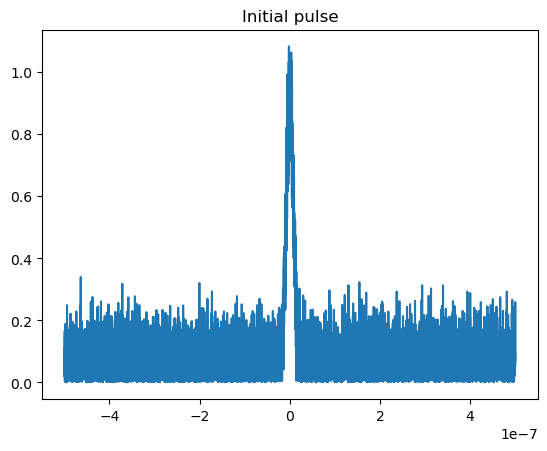

In [223]:
plt.plot(T,np.abs(A[0,:]))
plt.title("Initial pulse")
plt.show()


In [224]:
for i in tqdm(range(1,Nl)):
    # Fourier domain
    N = 1j*gamma*np.abs(A[i-1,:])**2-0.5*alpha
    Ai = np.fft.fftshift(np.fft.fft(A[i-1,:])) # Fourier
    Ai = np.exp(h*Dw)*Ai # Dispersion
    Ai = np.fft.ifft(np.fft.ifftshift(Ai)) # Temporal
    Ai = np.exp(h*N)*Ai # Nonlinearity
    A[i,:] = Ai
    B[i,:] = np.fft.fftshift(np.fft.fft(Ai))

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:04<00:00, 214.31it/s]


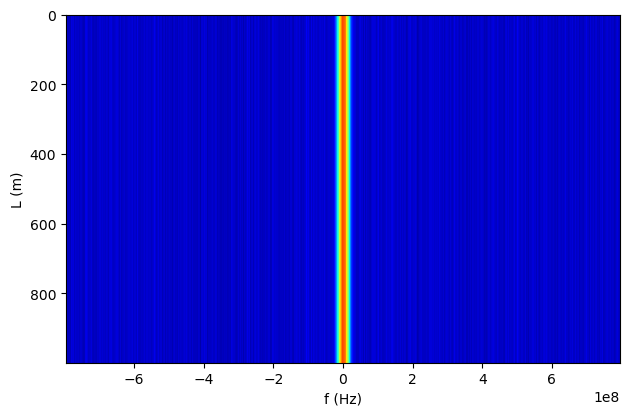

In [225]:
f = w/(2*np.pi)
extent = [f[0], f[-1], z[-1], z[0]]
plt.imshow(np.abs(A), extent=extent, aspect=1e6, cmap='jet')
plt.xlabel(r"f (Hz)")
plt.ylabel(r"L (m)")

plt.tight_layout()
plt.show()

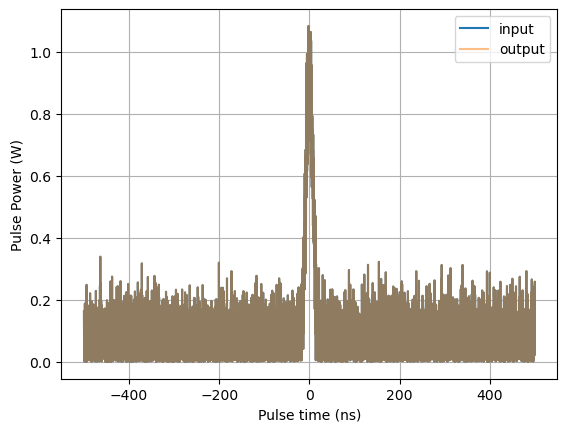

In [226]:
plt.plot(T/ns,np.abs(A[0,:]), label='input')
plt.plot(T/ns,np.abs(A[Nl-1,:]), label='output', alpha=0.5)

plt.grid()
plt.legend()
plt.xlabel("Pulse time (ns)")
plt.ylabel("Pulse Power (W)")
plt.show()


In [176]:
w[0]

-4999499999.996104

In [145]:
Dw

array([-0.-2.70839823e-05j, -0.-2.70828990e-05j, -0.-2.70818157e-05j, ...,
       -0.-2.70807323e-05j, -0.-2.70818157e-05j, -0.-2.70828990e-05j])

In [212]:
N

array([0.+4.16196581e-10j, 0.+1.79567089e-06j, 0.+1.19978882e-08j, ...,
       0.+1.67839854e-05j, 0.+1.97075903e-06j, 0.+6.25461916e-06j])